# Credit Risk Prediction Model


## Introduction

Nama   : Fitri Octaviani

Batch  : FTDS-HCK-06

Hallo. Perkenalkan, saya Fitri Octaviani. Saya fresh graduate Informatika yang tertarik dan antusias dengan hal yang berkaitan dengan data. Saya berharap dapat mengkombinasikan ilmu serta keahlian teknis dan keterampilan analitis untuk memanfaatkan data yang pada akhirnya dapat menciptakan solusi untuk mengatasi setiap tantangan yang muncul.

## Background

Dalam industri finance, risiko kredit menjadi salah satu hal yang sangat penting untuk di analisis. Risiko kredit mengacu pada potensi kerugian yang dapat ditimbulkan oleh pihak yang gagal memenuhi kewajibannya dalam membayar pinjaman. Bank dan lembaga keuangan sering kali mengalami tantangan dalam mengidentifikasi kredit yang berisiko tinggi karena kesalahan dalam memprediksi resiko kredit dapat menyebabkan dampak finansial yang signifikan.

Dengan perkembangan teknologi dan ketersediaan data yang semakin melimpah, metode prediksi resiko kredit berbasis data menjadi semakin relevan. Teknik seperti machine learning telah digunakan untuk memprediksi resiko kredit dengan akurasi yang lebih tinggi daripada metode tradisional.

## Problem Statement

Permasalahan yang perlu dipecahkan adalah mengembangkan model prediksi risiko kredit yang handal dan akurat. Model ini diharapkan dapat membantu lembaga keuangan dalam mengevaluasi kelayakan pemberian pinjaman kepada calon peminjam. Tantangan utamanya adalah menggabungkan berbagai data relevan untuk menciptakan model prediksi yang mampu mengidentifikasi peminjam yang berpotensi gagal membayar pinjaman dan yang tidak.

## Objective

Tujuan dari penelitian ini adalah untuk mengembangkan model prediksi resiko kredit yang akurat dan dapat diandalkan dengan memanfaatkan teknik-teknik machine learning. Dengan adanya model ini, diharapkan lembaga keuangan dapat mengambil langkah-langkah pencegahan yang lebih efektif terhadap risiko kredit yang tinggi, serta mengoptimalkan alokasi sumber daya untuk mengelola resijo secara lebih efisien. Selain itu, model ini juga dapat membantu meningkatkan transparansi dan pemahaman atas keputusan prediksi resiko kredit yang diambil.

# Import Library

> Pada section ini hanya berisi semua library yang digunakan dalam project dan mengecek versi dari beberapa library.

In [ ]:
!pip install -q kaggle

In [ ]:
!pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.7 MB/s eta 0:00:00


In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 4.6 MB/s eta 0:00:00


In [ ]:
# Data Loading
import pandas as pd
import numpy as np
import sklearn

# Data visualisasi
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# Korelasi phik
import phik
from phik.report import plot_correlation_matrix

# Train-Test Split, Cross Validation dan Hyperparameter Tuning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

# SMOTE
from imblearn.over_sampling import SMOTENC

# Model Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Save model
import joblib

# Set Options
pd.options.display.max_columns = 50

In [ ]:
# Cek versi library
print ('Pandas version : ', (pd.__version__))
print ('Numpy version : ', (np.__version__))
print ('Matplotlib version : ', (matplotlib.__version__))
print ('Seaborn version : ', (sns.__version__))
print ('Scikit-learn version : ', (sklearn.__version__))

Pandas version :  1.5.3
Numpy version :  1.23.5
Matplotlib version :  3.7.1
Seaborn version :  0.12.2
Scikit-learn version :  1.2.2


# Data Loading

> Pada section ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

> Proses data loading yang dilakukan adalah : mengakses dataset dari kaggle, menampilkan 10 data pertama dan 10 data terakhir dari dataset, mengecek ukuran dataset, melihat informasi yang ada dalam dataset (variabel apa saja yang ada dalam dataset, tipe data dari setiap variabel, jumlah missing value, cek duplikat dataset)

> Dalam data loading ini, saya akan mengakses dataset langsung dari kaggle sehingga tidak diperlukan proses mendownload file dataset ke local.

## Data Kaggle

In [ ]:
# Buat folder di root kaggle
!mkdir -p ~/.kaggle

# Copy paste kaggle.json ke folder
!cp kaggle.json ~/.kaggle

In [ ]:
# Mengubah izin akses agar hanya user yang dapat akses
!chmod 600 ~/.kaggle/kaggle.json

# Cek list di folder kaggle
!ls ~/.kaggle

kaggle.json


In [ ]:
# Download dataset
!kaggle datasets download -d whenamancodes/credit-card-customers-prediction

100% 379k/379k [00:00<00:00, 983kB/s]
100% 379k/379k [00:00<00:00, 982kB/s]


In [ ]:
# Unzip dataset ke folder dataset
!unzip -q /content/credit-card-customers-prediction.zip -d dataset

In [ ]:
# Data loading
df = pd.read_csv('/content/dataset/BankChurners.csv')

# Menampilkan 10 baris teratas dari dataset
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [ ]:
# Menampilkan 10 baris terbawah dari dataset
df.tail(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106,0.000516,0.999480
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096,0.998130,0.001874
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0.996910,0.003088
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,0.000038,0.999960
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,0.000148,0.999850
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


Berikut adalah variabel dan definisi dari setiap kolom dalam dataset.

| Column | Description |
|--------|-------------|
| CLIENTNUM | ID user |
| Attrition_Flag | Aktivitas user, jika akun ditutup maka 1, tidak ditutup 0 |
| Customer_Age | Usia user |
| Gender | Jenis kelamin, seperti M=Pria dan F=Wanita |
| Dependent_count | Jumlah tanggungan |
| Education_Level | Tingkat pendidikan |
| Marital_Status | Status pernikahan, seperti Married, Single, Divorced, Unknown |
| Income_Category | Kategori pendapatan tahunan (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >) |
| Card_Category | Kategori kartu (Blue, Silver, Gold, Platinum) |
| Months_on_book | Periode hubungan dengan bank dalam bulan |
| Total_Relationship_count | Total jumlah produk yang dimiliki oleh pelanggan |
| Months_Inactive_12_mon | Jumlah bulan tidak aktif dalam 12 bulan terakhir |
| Contacts_Count_12_mon | Jumlah kontrak dalam 12 bulan terakhir |
| Credit_Limit | Limit kredit pada kartu kredit |
| Total_Revolving_Bal | Total saldo berputar pada kartu kredit |
| Avg_Open_To_Buy | Terbuka untuk beli credit line (rata-rata dari 12 bulan terakhir) |
| Total_Amt_Chng_Q4_Q1 | Perubahan jumlah transaksi (Q4 dibandingkan Q1) |
| Total_Trans_Amt | Jumlah total uang yang dihabiskan dalam transaksi (12 bulan terakhir) |
| Total_Trans_Ct | Jumlah total transaksi (12 bulan terakhir) |
| Total_Ct_Chng_Q4_Q1 | Perubahan jumlah transaksi (Q4 dibandingkan Q1) |
| Avg_Utilization_Ratio | Rata-rata rasio pemanfaatan kartu |
| Naive_Bayes_Classifier_attribution | Naive Bayes |
| Naive_Bayes_Classifier_attribution | Naive Bayes. |


In [ ]:
# Melihat shape dataset
df.shape

(10127, 23)

Dari informasi di atas, kita dapat mengetahui terdapat 10127 baris dan 23 kolom dalam dataframe ini.

In [ ]:
# Melihat kolom-kolom dataframe
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# Melihat list kolom yang memiliki nilai sebagai kategori
cat_cols = list(df.select_dtypes(include='object'))
cat_cols

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

Selanjutnya, saya ingin mengecek unique value yang ada pada dataset untuk kolom kategori.

In [ ]:
# Overview dari kolom kategori
for i in cat_cols:
  print('Column : ',i)
  print('Total unique labels: ', df[i].nunique())
  print(df[i].value_counts())
  print('-' * 40)

Column :  Attrition_Flag
Total unique labels:  2
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
Column :  Gender
Total unique labels:  2
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Column :  Education_Level
Total unique labels:  7
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Column :  Marital_Status
Total unique labels:  4
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Column :  Income_Category
Total unique labels:  6
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: in

In [ ]:
# Melihat list kolom yang memiliki nilai sebagai numerikal
num_cols = df.describe().columns.tolist()
num_cols

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [ ]:
# Numerical overview
for i in num_cols:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 40)

Column:  CLIENTNUM
Total unique labels:  10127
----------------------------------------
Column:  Customer_Age
Total unique labels:  45
----------------------------------------
Column:  Dependent_count
Total unique labels:  6
----------------------------------------
Column:  Months_on_book
Total unique labels:  44
----------------------------------------
Column:  Total_Relationship_Count
Total unique labels:  6
----------------------------------------
Column:  Months_Inactive_12_mon
Total unique labels:  7
----------------------------------------
Column:  Contacts_Count_12_mon
Total unique labels:  7
----------------------------------------
Column:  Credit_Limit
Total unique labels:  6205
----------------------------------------
Column:  Total_Revolving_Bal
Total unique labels:  1974
----------------------------------------
Column:  Avg_Open_To_Buy
Total unique labels:  6813
----------------------------------------
Column:  Total_Amt_Chng_Q4_Q1
Total unique labels:  1158
---------------

Selanjutnya, saya akan mengecek ada variabel apa saja dan tipe data di dalamnya dan apaka terdapat missing value dari setiap kolom yang ada di dalam dataframe tersebut dengan .info() dan .isnull()

## Missing Value

In [ ]:
# Melihat tipe data dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Dari informasi diatas di ketahui bahwa :

- Data Types : Menunjukkan tipe data dari setiap kolom di DataFrame. Ini termasuk type numerik (integer dan float), type object (string), type kategori, dan lainnya.
- Ini menunjukkan jumlah nilai non-null (non-missing) di setiap kolom. Dalam hal ini memberikan gambaran tentang apakah terdapat nilai yang hilang dalam dataset.

In [ ]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

Setelah dilihat ternyata dalam dataset tersebut tidak ada missing value.

Selanjutnya, saya ingin memeriksa data duplikat. Data duplikat merupakan langkah penting dalam analisis data dan preprocessing data. Menangani dan mengidentifikasi data duplikat sangat penting karena dapat menyebabkan hasil yang bias, analisis statistik yang salah, dan overfitting dalam machine learning.

## Data Duplikat


In [ ]:
# Melihat jumlah duplikat data
df.duplicated().sum()

0

Berdasarkan informasi di atas menunjukkan bahwa tidak ada data yang terduplikasi.

# Exploratory Data Analysis

> Pada section ini berisi eksplorasi data pada dataset dengan menggunakan visualisasi sederhana.

## Drop Kolom

Drop kolom yang berisi informasi yang tidak relevan atau tidak perlu.
- Dalam dataset ini, kolom "CLIENTNUM" di drop karena berfungsi sebagai user id untuk setiap anggota atau individu dalam dataset.
- Selain itu, drop kolom "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1" dan "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2" karena tidak mengandung informasi relevan yang dapat berkontribusi pada proses analisis atau pemodelan.

In [ ]:
# Copy dataset
df_eda = df.copy()

# Drop kolom
df_eda = df_eda.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
df_eda.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Income Category - Credit Risk Category

> Pada section ini, Exploratory Data Analysis (EDA) dilakukan untuk mengidentifikasi unique value pada kolom Income_Category. Kemudian, dibuat kolom baru bernama Credit_Risk_Category yang berisi high risk dan low risk berdasarkan income category.

In [ ]:
# Unique dari Card_Category
df_eda['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
# Income category
income_cat = ['$120K +', '$80K - $120K', '$60K - $80K']
df_eda['Credit_Risk'] = np.where(df_eda['Income_Category'].isin(income_cat),1,0)
df_eda['Credit_Risk_Cat'] = np.where(df_eda['Income_Category'].isin(income_cat), 'High Risk', 'Low Risk')
df_eda.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Risk,Credit_Risk_Cat
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,High Risk
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,Low Risk
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,High Risk
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,Low Risk
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,High Risk


In [ ]:
df_eda['Credit_Risk_Cat'].value_counts()

Low Risk     6463
High Risk    3664
Name: Credit_Risk_Cat, dtype: int64

## Descriptive Statistic

> Melakukan statistik deskriptif pada data numerik sangat penting untuk mendapatkan wawasan tentang distibusi, central tendency, variabilitas, dan karateristik data lainnya.

In [ ]:
df_eda.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Risk
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.361805
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.480547
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000


Dari descriptive statistic diatas dapat diketahui :
- Customer Age : Rata-rata usia nasabah adalah 46 tahun dengan rentang usia antara 26 tahun hingga 73 tahun. Usia pelanggan paling banyak berada di sekitar 41 hingga 52 tahun (kuartil pertama hingga ketiga).
- Dependet count (jumlah tanggungan) : rata-rata jumlah tanggungan adalah sekitar 2, dengan sebagian besar nasabah memiliki 1 hingga 3 tanggungan. Dalam hal ini memberikan gambaran tentang keadaan keluarga nasabah.
- Months_on_book : rata-rata masa hubungan nasabah dengan bank adalah sekitar 36bulan (3tahun).
- Months_Inactive_12_mon : rata-rata nasabah tidak aktif dalam 12 bulan terakhir adalah sekitar 2 bulan. Sebagian besar pelanggan memiliki 2 hingga 3 bulan tidak aktif.
- Credit_Limit : rata-rata credit limit adalah sekitar $8632 dengan standar deviasi yang cukup besar.

## Univariate Analysis

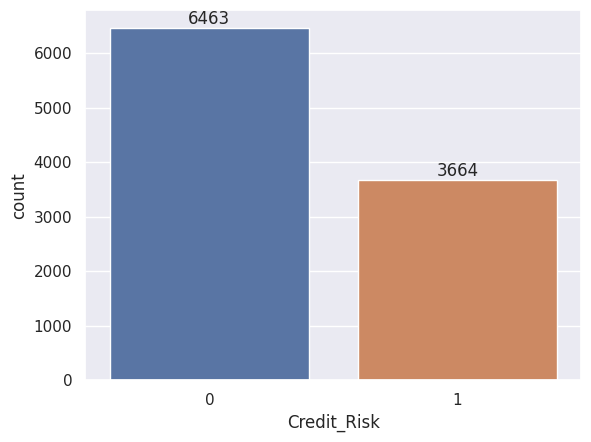

In [ ]:
# plot perbandingan jumlah target
ax = sns.countplot(x=df_eda.Credit_Risk, data=df_eda)
ax.bar_label(ax.containers[0])
plt.show()

Dari visualisasi di atas dapat dilihat bahwa kolom Credit Risk menunjukkan distribusi kelas yang tidak seimbang, dengan jumlah credit risk yang dikategorikan Low Risk lebih banyak dibandingkan dengan High Risk.

Adanya kelas yang tidak seimbang (class imbalance) dapat memengaruhi kinerja model, terutama jika kelas minoritas (High Risk) memiliki kepentingan tertentu dan perlu diidentifikasi secara akurat. Dalam kasus seperti ini, mengatasi ketidakseimbangan kelas menjadi penting untuk memastikan bahwa model dapat secara efektif mendeteksi instance dari kelas minoritas.

Teknik yang tepat untuk menangani data yang tidak seimbang, seperti metode resampling dapat dipertimbangkan untuk meningkatkan performa model dalam memprediksi secara akurat.

Education_Level  Credit_Risk_Cat
College          High Risk           377
                 Low Risk            636
Doctorate        High Risk           153
                 Low Risk            298
Graduate         High Risk          1104
                 Low Risk           2024
High School      High Risk           762
                 Low Risk           1251
Post-Graduate    High Risk           188
                 Low Risk            328
Uneducated       High Risk           531
                 Low Risk            956
Unknown          High Risk           549
                 Low Risk            970
dtype: int64


Text(0.5, 1.0, 'Jumlah Credit Risk Berdasarkan Education Level')

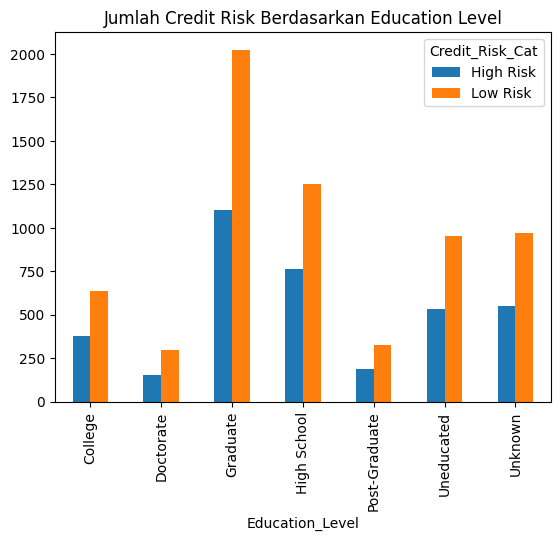

In [ ]:
#melihat total kategori Education_Level berdasarkan Credit_Risk
print(df_eda.groupby(['Education_Level','Credit_Risk_Cat']).size())
df_eda.groupby(['Education_Level','Credit_Risk_Cat']).size().unstack(fill_value=0).plot(kind='bar').set_title('Jumlah Credit Risk Berdasarkan Education Level')

> Berdasarkan hasil output, terdapat hubungan antara tingkat risiko kredit (High Risk atau Low Risk) dengan tingkat pendidikan (Education Level), diantaranya :
- Terdapat pola yang menunjukkan bahwa individu dengan tingkat pendidikan yang lebih rendah cenderung memiliki risiko kredit yang lebih rendah. Tingkat pendidikan yang lebih tinggi dapat mencerminkan stabilitas keuangan yang lebih baik, oengetahuan tentang manajemen keuangan, dan perluang pekerjaan yang lebih baik. Sebaliknya, individu dengan pendidikan yang lebih rendah mungkin menghadapi kesulitan finansial dan memiliki risiko kredit yang lebih tinggi.
- Kesimpulan tersebut menunjukkan bahwa pendidikan dapat berperan sebagai faktor mitigasi risiko kredit. Oleh karena itu, lembaga keuangan dapat mempertimbangkan pendidikan sebagai salah satu variabel dalam proses penilaian risiko kredit.

> Strategi bisnis :
- Lembaga keuangan dapat mempertimbangkan untuk mengembangkan produk edukasi keuangan yang di targetkan pada individu dengan pendidikan rendah. Ini dapat membantu meningkatkan literasi keuangan mereka sehingga mengurangi risiko kredit di masa depan.
- Meskipun pendidikan tampaknya memiliki korelasi dengan risiko kredit, namun penting untuk diingat bahwa faktor-faktor lain juga dapat memengaruhi risiko kredit, seperti riwayat kredit sebelumnya, penghasilan, pekerjaan, dan lainnya. Oleh karena itu, penting untuk mempertimbangkan variabel-variabel ini secara bersamaan dalam analisis risiko kredit.

Education_Level  Card_Category
College          Blue              940
                 Gold               15
                 Silver             58
Doctorate        Blue              422
                 Gold                5
                 Platinum            2
                 Silver             22
Graduate         Blue             2899
                 Gold               36
                 Platinum            8
                 Silver            185
High School      Blue             1888
                 Gold               26
                 Platinum            1
                 Silver             98
Post-Graduate    Blue              476
                 Gold                5
                 Platinum            3
                 Silver             32
Uneducated       Blue             1391
                 Gold               11
                 Platinum            3
                 Silver             82
Unknown          Blue             1420
                 Gold            

Text(0.5, 1.0, 'Jumlah Card Category Berdasarkan Education Level')

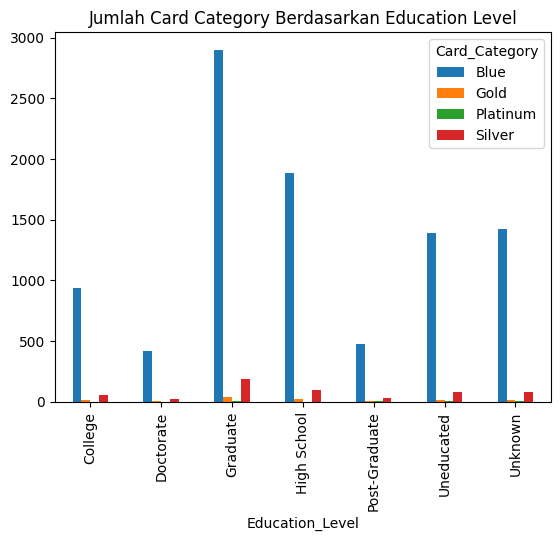

In [ ]:
#melihat total kategori Education_Level berdasarkan Card_Category
print(df_eda.groupby(['Education_Level','Card_Category']).size())
df_eda.groupby(['Education_Level','Card_Category']).size().unstack(fill_value=0).plot(kind='bar').set_title('Jumlah Card Category Berdasarkan Education Level')

> Dari hasil output, kita dapat menarik beberapa insight mengenai distribusi kombinasi 'education_level' (tingkat pendidikan) dan 'card_category' (kategori kartu) pada dataset:
- Blue card : pemegang kartu dengan tingkat pendidikan "College", "Doctorate", "Graduate", "High School", "Post-Graduate", "Uneducated", dan "Unknown" umumnya lebih sering memiliki kartu kredit dengan kategori "Blue". Ini menunjukkan bahwa mayoritas pemegang kartu di semua tingkat pendidikan lebih memilih "Blue" dibandingkan dengan kartu lainnya.
- Silver card dan Gold card : kartu kredit dengan kategori "Silver" lebih umum di gunakan oleh pemengang kartu dengan tingkat pendidikan "College", "Graduate", "High School", dan "Uneducated" dengan jumlah yang relatif rendah. Sedangkan kartu kredit dengan kategori "Gold" cenderung memiliki jumlah yang lebih rendah dibandingkan dengan kartu Gold, tetapi tetap ada beberapa pemegang kartu dengan tingkat pendidikan yang berbeda.
- Platinum card : kartu kredit dengan kategori "Platinum" umumnya lebih jarang ditemukan di semua tingkat pendidikan, tetapi beberapa pemegang kartu dengan tingkat pendidikan tertentu memilih kartu ini, seperti tingkat pendidikan "Graduate" memiliki 8 pengguna.


> Strategi bisnis :
- Dengan memahami bahwa mayoritas pemegang kartu dari semua tingkat pendidikan lebih memilih kartu kategori "Blue", sehingga bank dapat mengarahkan upaya pemasaran dan promosi lebih lanjut mengenai kartu ini. Namun, perlu diingat bahwa promosi harus relevan dengan segmen yang dituju untuk menghindari risiko kredit yang tidak terkendali.
- Untuk pemegang kartu dengan tingkat pendidikan tertentu yang lebih cenderung memilih kartu kategori "Silver" atau "Gold", bank dapat merancang penawaran yang disesuaikan dengan kebutuhan dan preferensi mereka. Ini dapat mencakup manfaat tambahan seperti reward points, diskon khusus, atau perlindungan asuransi.
- Pemegang kartu dengan kategori "Platinum" dapat menjadi target segmentasi khusus. Bank dapat menyediakan layanan premium, akses eksklusif, dan manfaat istimewa lainnya yang sesuai dengan profil pemegang kartu ini.


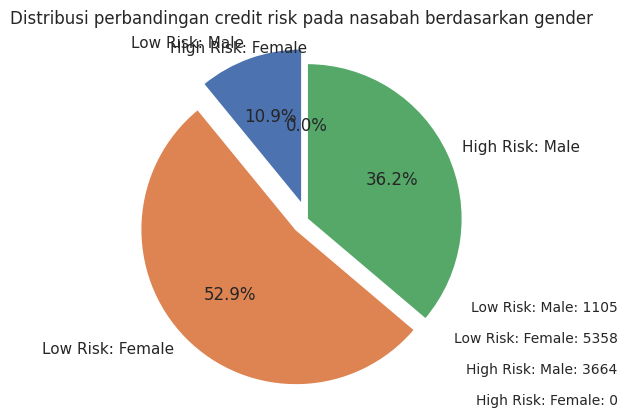

In [ ]:
# Melakukan filter data
low_risk = df_eda[(df_eda['Credit_Risk_Cat'] == 'Low Risk') & (df_eda['Credit_Risk_Cat'] == 'Low Risk')]
high_risk = df_eda[(df_eda['Credit_Risk_Cat'] == 'High Risk') & (df_eda['Credit_Risk_Cat'] == 'High Risk')]
male_low = low_risk[(low_risk['Gender'] == 'M')].shape[0]
female_low = low_risk[(low_risk['Gender'] == 'F')].shape[0]
male_high = high_risk[(high_risk['Gender'] == 'M')].shape[0]
female_high = high_risk[(high_risk['Gender'] == 'F')].shape[0]

size = [male_low, female_low, male_high, female_high]
label = ['Low Risk: Male', 'Low Risk: Female', 'High Risk: Male', 'High Risk: Female']
explode = (0.1, 0.1, 0, 0)

plt.pie(size, labels=label, explode=explode, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribusi perbandingan credit risk pada nasabah berdasarkan gender')

for i, label in enumerate(label):
    plt.text(2, -0.6-i*0.2, f'{label}: {size[i]}', fontsize=10, ha='right')

plt.show()

> Terdapat beberapa insight dari hasil visualisasi di atas :
- Pola gender dan risiko: terlihat bahwa tidak ada wanita yang terkategori sebagai high risk. Ini bisa jadi menunjukkan pola bahwa wanita cenderung memiliki profil kredit yang lebih baik dibandingkan pria. Hal ini bisa diakibatkan oleh faktor-faktor seperti pengelolaan uang yang lebih hati-hati atau ketidakseimbangan jumlah sampel antara pria dan wanita.
- Data tersebut mengindikasikan bahwa pria memiliki jumlah high risk yang lebih tinggi daripada wanita, sedangkan wanita lebih dalam kategori low riks. Ini menunjukkan pentingnya segmentasi data dalam bisnis untuk memahami profil risiko berbeda antara kelompok gender dan mengambil langkah-langkah yang sesuai.

>Strategi bisnis :
- Dalam data ini dapat mengembangkan penawaran yang lebih personal dan relevan untuk masing-masing kelompok risiko. Berdasarkan jenis kelamin dan tingkat risiko, bisnis dapat merancang produk atau layanan khusus yang lebih sesuai dengan kebutuhan atau preferensi pelanggan.

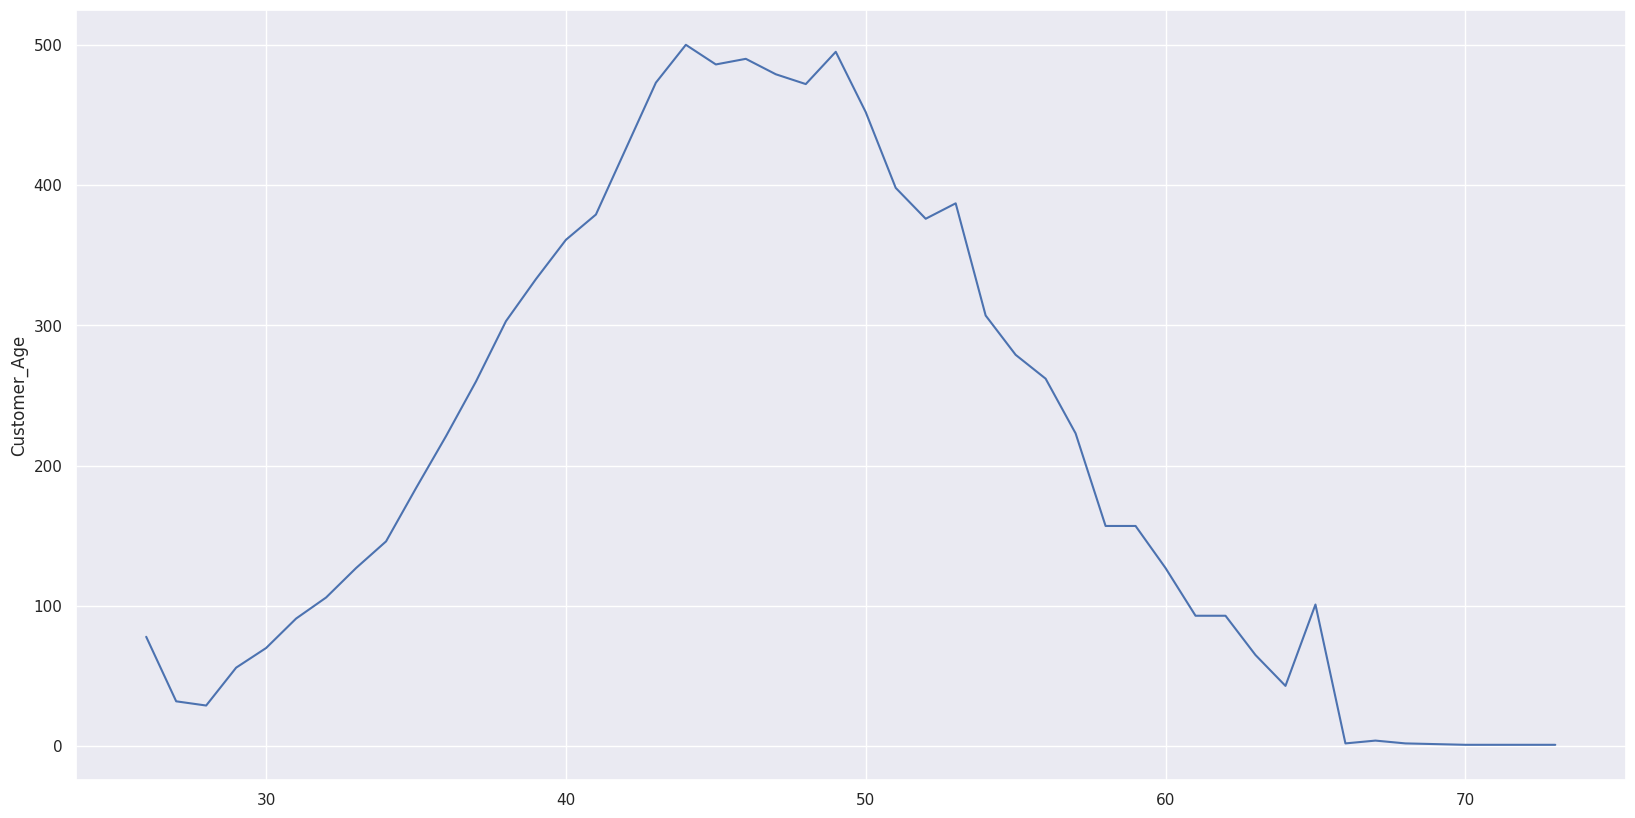

In [ ]:
plt.figure(figsize=[20,10])
sns.lineplot(data = df_eda['Customer_Age'].value_counts())
plt.title('')
plt.xlabel('')
plt.show()

> Dari hasil visualisasi linechart diperoleh :
- Rata-rata umur nasabah antara 41 hingga 52 tahun, hal ini dapat mencerminkan stabilitas finansial dan pengalaman dalam mengelola keuangan.

> Strategi bisnis :
- Dalam hal ini dapat merancang produk kredit yang mengakomodasi kebutuhan nasabah dalam kelompok usia 41 hingga 52 tahun. Produk-produk ini dapat berfokus pada kebutuhan finansial yang umum di kalangan usia ini, seperti pembiayaan pendidikan anak, perencanaan pensiun, atau pembelian properti. Akan tetapi tetap penting untuk melakukan penilaian risiko yang cermat.

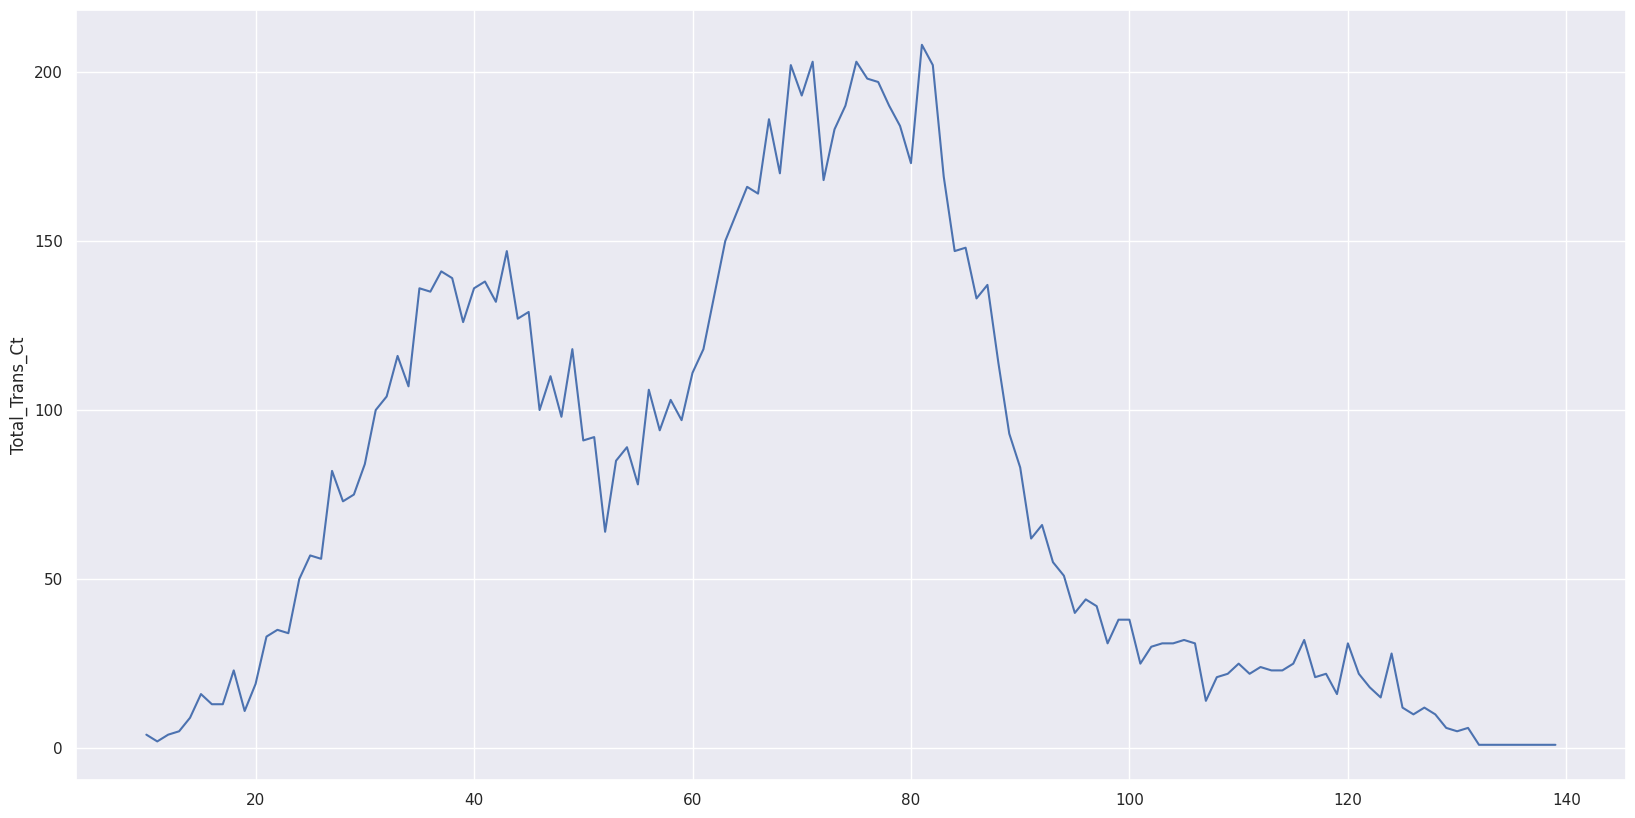

In [ ]:
plt.figure(figsize=[20,10])
sns.lineplot(data = df_eda['Total_Trans_Ct'].value_counts())
plt.title('')
plt.xlabel('')
plt.show()

> Dari hasil visualisasi linechart diatas, terlihat bahwa nasabah rata-rata melakukan jumlah total transaksi sebanyak 65.

# 5. Feature Engineering

## Data Inference

Section ini menjelaskan cara membuat inference data. Inference data berbeda dari data train dan test, inference digunakan untuk mengevaluasi performa model pada data mentah yang baru. Untuk membuat inference data, saya akan menyisihkan 10 data dari dataset awal.

In [ ]:
# Membuat data inference
inf = df.copy()
df_inf = inf.sample(10, random_state=42).sort_index()
df_inf.reset_index(drop=True).head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,718943508,Existing Customer,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584,0.000205,0.99979
1,773503308,Existing Customer,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716,0.000556,0.99944
2,717189183,Existing Customer,35,M,1,Doctorate,Single,$40K - $60K,Blue,24,6,3,2,10467.0,1961,8506.0,0.713,2665,65,0.667,0.187,0.000244,0.99976
3,719455083,Existing Customer,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504,0.000551,0.99945
4,778247358,Existing Customer,65,M,1,Graduate,Single,Less than $40K,Blue,56,5,3,2,7636.0,0,7636.0,0.801,3880,67,0.811,0.000,0.000169,0.99983
5,712050933,Attrited Customer,48,M,4,College,Married,$80K - $120K,Blue,32,5,2,3,25190.0,0,25190.0,0.467,1533,41,0.323,0.000,0.994900,0.00510
6,710431158,Existing Customer,52,F,3,Unknown,Single,Unknown,Blue,36,3,1,2,10273.0,1657,8616.0,0.710,3778,70,0.591,0.161,0.000063,0.99994
7,715452408,Existing Customer,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569,0.000303,0.99970
8,715252383,Existing Customer,58,F,2,High School,Divorced,Unknown,Gold,36,5,4,3,34516.0,1864,32652.0,0.664,3595,52,0.733,0.054,0.000409,0.99959
9,711264033,Existing Customer,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317,0.000287,0.99971


In [ ]:
# Save data inference ke file .csv
df_inf.to_csv('data_inference.csv')

In [ ]:
# Hapus data inference dari dataset
df_preproces = df_eda.drop(df_inf.index)
print('size dataset asli :',df.shape)
print('size dataset setelah inferensi data :',df_preproces.shape)

size dataset asli : (10127, 23)
size dataset setelah inferensi data : (10117, 22)


## Feature Selection

Section ini menjelaskan tentang proses pembuatan model dengan feature selection menggunakan metode phik.

interval columns not set, guessing: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Credit_Risk']


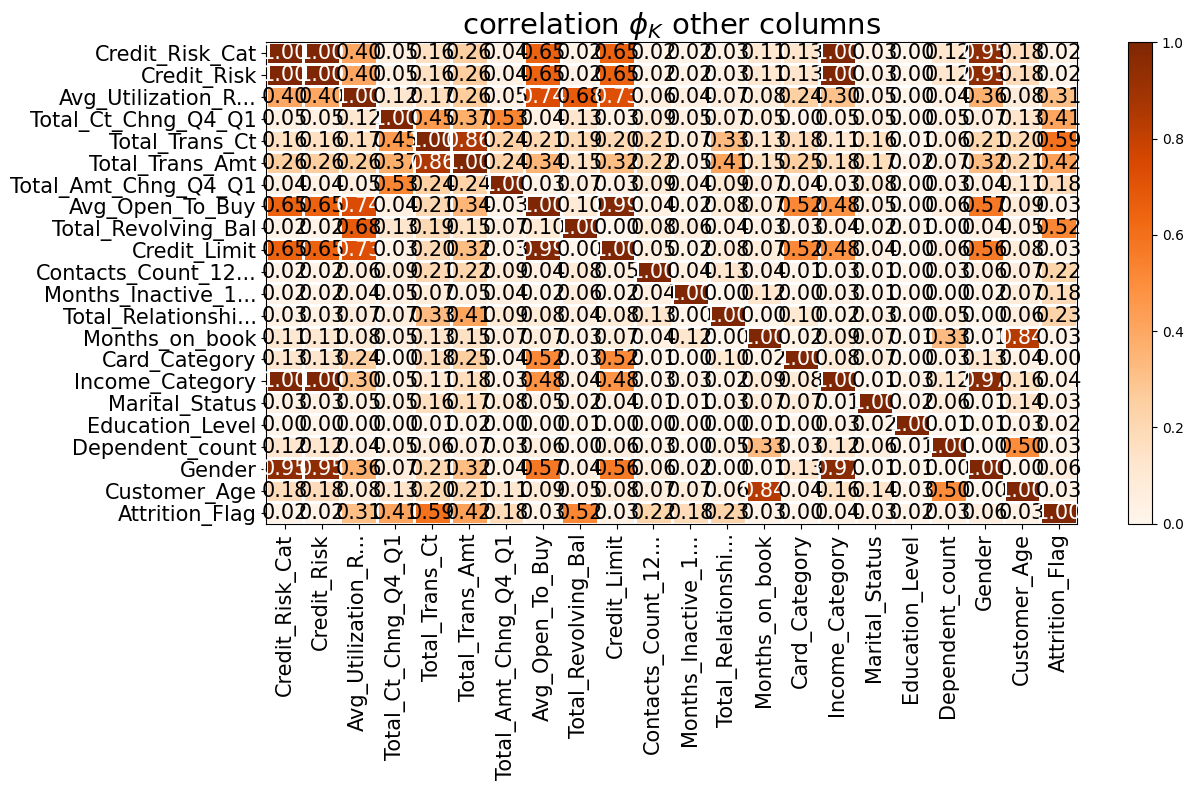

In [ ]:
# get the phi_k correlation matrix between all variables
phik_matrix = df_preproces.phik_matrix()
plot_correlation_matrix(phik_matrix.values,
                        x_labels=phik_matrix.columns,
                        y_labels=phik_matrix.index,
                        vmin=0, vmax=1, color_map="Oranges",
                        title=r"correlation $\phi_K$ other columns",
                        fontsize_factor=1.5,
                        figsize=(13,8))
plt.tight_layout()

In [ ]:
# cek korelasi yang memiliki signifikansi terhadap death_event
df_preproces.phik_matrix().Credit_Risk.sort_values(ascending=False)

interval columns not set, guessing: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Credit_Risk']


Credit_Risk_Cat             1.000000
Credit_Risk                 1.000000
Income_Category             1.000000
Gender                      0.950246
Avg_Open_To_Buy             0.652310
Credit_Limit                0.649949
Avg_Utilization_Ratio       0.399165
Total_Trans_Amt             0.256246
Customer_Age                0.182025
Total_Trans_Ct              0.158248
Card_Category               0.125676
Dependent_count             0.124802
Months_on_book              0.107792
Total_Ct_Chng_Q4_Q1         0.046141
Total_Amt_Chng_Q4_Q1        0.037894
Marital_Status              0.033316
Total_Relationship_Count    0.027471
Months_Inactive_12_mon      0.024513
Contacts_Count_12_mon       0.023512
Attrition_Flag              0.023478
Total_Revolving_Bal         0.018705
Education_Level             0.000000
Name: Credit_Risk, dtype: float64

- Berdasarkan korelasi phik matrix, terdapat beberapa kolom yang memiliki korelasi kurang dari 0.1, diantaranya 'Education_Level', 'Total_Revolving_Bal', 'Attrition_Flag', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Total_Relationship_Count', 'Marital_Status', 'Total_Amt_Chng_Q4_Q1', dan 'Total_Ct_Chng_Q4_Q1'.
- Feature yang saya gunakan adalah dengan nilai threshold di atas 0.1, sehingga kita dapat drop kolom-kolom yang memiliki korelasi yang rendah. Hal ini dilakukan agar dapat membangun model yang lebih sederhana dan lebih mudah di interpretasikan, proses analisis dan prediksi dapat menjadi lebih efisien karena fokus pada variabel yang memiliki korelasi lebih tinggi.

In [ ]:
dropped_features = ['Education_Level', 'Total_Revolving_Bal', 'Attrition_Flag',
                    'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Total_Relationship_Count',
                    'Marital_Status', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']
df_preproces.drop(columns=dropped_features,inplace=True)

In [ ]:
df_preproces

,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Credit_Risk,Credit_Risk_Cat
0,45,M,3,$60K - $80K,Blue,39,12691.0,11914.0,1144,42,0.061,1,High Risk
1,49,F,5,Less than $40K,Blue,44,8256.0,7392.0,1291,33,0.105,0,Low Risk
2,51,M,3,$80K - $120K,Blue,36,3418.0,3418.0,1887,20,0.000,1,High Risk
3,40,F,4,Less than $40K,Blue,34,3313.0,796.0,1171,20,0.760,0,Low Risk
4,40,M,3,$60K - $80K,Blue,21,4716.0,4716.0,816,28,0.000,1,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,$40K - $60K,Blue,40,4003.0,2152.0,15476,117,0.462,0,Low Risk
10123,41,M,2,$40K - $60K,Blue,25,4277.0,2091.0,8764,69,0.511,0,Low Risk
10124,44,F,1,Less than $40K,Blue,36,5409.0,5409.0,10291,60,0.000,0,Low Risk
10125,30,M,2,$40K - $60K,Blue,36,5281.0,5281.0,8395,62,0.000,0,Low Risk


# Train Test Split

> Setelah memperoleh informasi pada proses EDA, selanjutnya saya akan mempersiapkan data train dan data test yang akan dipakai pada model training dan model evaluasi.

In [ ]:
# Split antara fitur dan target
X = df_preproces.drop(['Income_Category','Credit_Risk','Credit_Risk_Cat'],axis=1)
y = pd.DataFrame(df_preproces['Credit_Risk'])
X.head()

,Customer_Age,Gender,Dependent_count,Card_Category,Months_on_book,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,45,M,3,Blue,39,12691.0,11914.0,1144,42,0.061
1,49,F,5,Blue,44,8256.0,7392.0,1291,33,0.105
2,51,M,3,Blue,36,3418.0,3418.0,1887,20,0.000
3,40,F,4,Blue,34,3313.0,796.0,1171,20,0.760
4,40,M,3,Blue,21,4716.0,4716.0,816,28,0.000


In [ ]:
# split antara train dan test dengan cara stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (8093, 10)
test size: (2024, 10)


Dalam model ini, dataset akan di train sebanyak 8093 baris dan test sebanyak 2024 baris.

# Preprocessing

> Pada section ini, saya akan mengolah data yang telah saya eksplorasi sebelum masuk ke bagian modeling.

## Handling Outlier

> Dalam tahap ini akan dilakukan handling outlier pada kolom numerikal kontinu dengan melihat distribusi dan outlier.

In [ ]:
# fungsi untuk membuat histogram dan boxplot dari suatu fitur
def plot_diagnostic(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (10, 3))

    # histogram
    sns.histplot(df[col],ax = axes[0], bins=10)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1], whis=1.5)
    axes[1].set_title(f"Boxplot '{col}'")

    plt.show()

    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normally distributed".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' is moderately right skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' is highly right skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' is moderately left skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' is highly left skewed".format(col))

In [ ]:
# fungsi untuk mendapatkan upper dan lower boundary dari suatu distribusi
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
df_preproces.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10117 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_Age           10117 non-null  int64  
 1   Gender                 10117 non-null  object 
 2   Dependent_count        10117 non-null  int64  
 3   Income_Category        10117 non-null  object 
 4   Card_Category          10117 non-null  object 
 5   Months_on_book         10117 non-null  int64  
 6   Credit_Limit           10117 non-null  float64
 7   Avg_Open_To_Buy        10117 non-null  float64
 8   Total_Trans_Amt        10117 non-null  int64  
 9   Total_Trans_Ct         10117 non-null  int64  
 10  Avg_Utilization_Ratio  10117 non-null  float64
 11  Credit_Risk            10117 non-null  int64  
 12  Credit_Risk_Cat        10117 non-null  object 
dtypes: float64(3), int64(6), object(4)
memory usage: 1.1+ MB


In [ ]:
# Kolom untuk numerikal
numeric_col = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy',
               'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

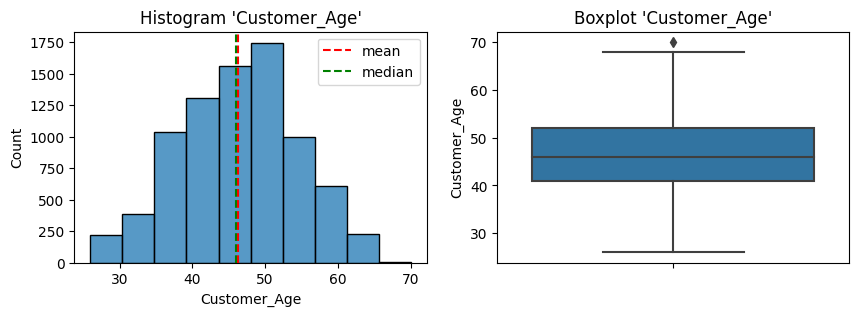

Customer_Age Kurtosis: -0.29760165946426165
Customer_Age Skewness: -0.05935198021196341
Columns 'Customer_Age' is normally distributed


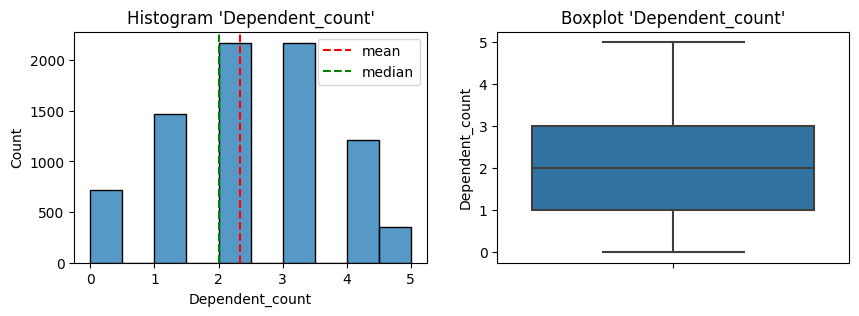

Dependent_count Kurtosis: -0.6530688466290471
Dependent_count Skewness: 0.00015125269203016415
Columns 'Dependent_count' is normally distributed


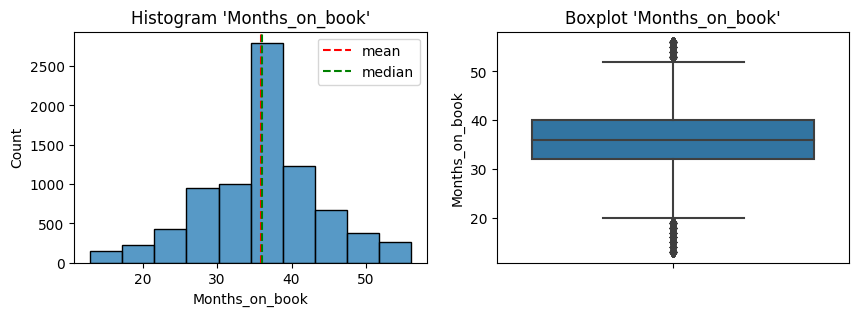

Months_on_book Kurtosis: 0.4133647912299496
Months_on_book Skewness: -0.13586051707932376
Columns 'Months_on_book' is normally distributed


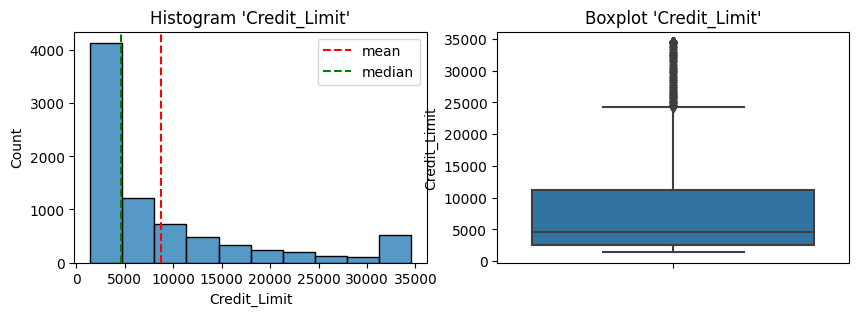

Credit_Limit Kurtosis: 1.7165678487835505
Credit_Limit Skewness: 1.6463099769735783
Columns 'Credit_Limit' is highly right skewed


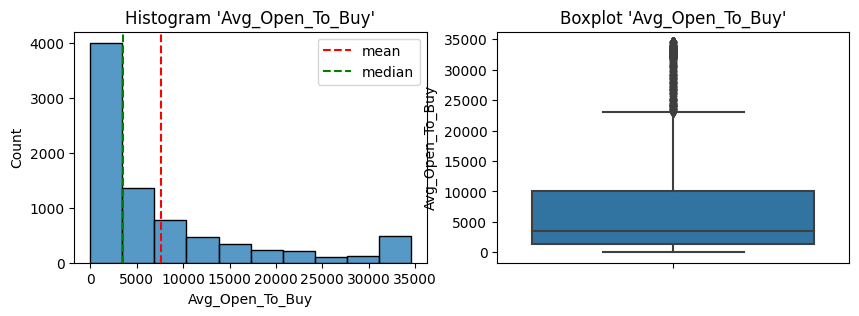

Avg_Open_To_Buy Kurtosis: 1.7092954969082452
Avg_Open_To_Buy Skewness: 1.6418239788906035
Columns 'Avg_Open_To_Buy' is highly right skewed


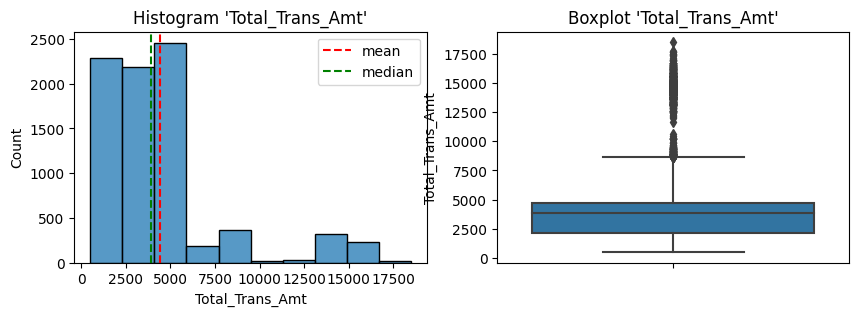

Total_Trans_Amt Kurtosis: 3.8156076762339213
Total_Trans_Amt Skewness: 2.0308202556304407
Columns 'Total_Trans_Amt' is highly right skewed


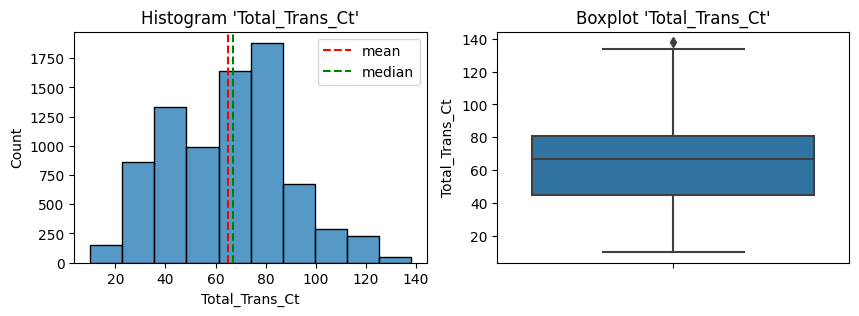

Total_Trans_Ct Kurtosis: -0.38822366176348755
Total_Trans_Ct Skewness: 0.151031045067482
Columns 'Total_Trans_Ct' is normally distributed


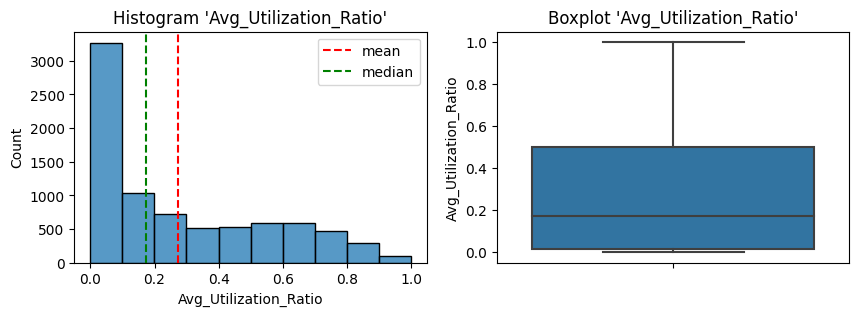

Avg_Utilization_Ratio Kurtosis: -0.7668574317132908
Avg_Utilization_Ratio Skewness: 0.7361650368537875
Columns 'Avg_Utilization_Ratio' is moderately right skewed


In [ ]:
# plot semua fitur pada data train yang numerik
for i, col_name in enumerate(numeric_col):
    plot_diagnostic(X_train, col_name)

Pada kolom numerikal, kolom yang memiliki outlier adalah Customer_Age dengan skew -0.297, kolom Months_on_book dengan skew -0.135, kolom Credit_Limit dengan skew 1.646, kolom Avg_Open_To_Buy dengan skew 1.641, kolom Total_Trans_Amt dengan skew 2.030, dan kolom Total_Trans_Ct dengan skew 0.151. Sehingga dalam hal ini akan dilakukan dengan handling outlier menggunakan metode capping IQR.

In [ ]:
# outlier detection in Months_on_book
Q1 = df_preproces['Months_on_book'].quantile(.25)
Q3 = df_preproces['Months_on_book'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_preproces[(df_preproces['Months_on_book'] <= lower) | (df_preproces['Months_on_book'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  3.801718179125111 %
upper:  53.5
lower:  17.5


In [ ]:
# outlier detection in Credit_Limit
Q1 = df_preproces['Credit_Limit'].quantile(.25)
Q3 = df_preproces['Credit_Limit'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_preproces[(df_preproces['Credit_Limit'] <= lower) | (df_preproces['Credit_Limit'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  9.696850004937296 %
upper:  23837.5
lower:  -10214.5


In [ ]:
# outlier detection in Avg_Open_To_Buy
Q1 = df_preproces['Avg_Open_To_Buy'].quantile(.25)
Q3 = df_preproces['Avg_Open_To_Buy'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_preproces[(df_preproces['Avg_Open_To_Buy'] <= lower) | (df_preproces['Avg_Open_To_Buy'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  9.479608966130147 %
upper:  22666.5
lower:  -11481.5


In [ ]:
# outlier detection in Total_Trans_Amt
Q1 = df_preproces['Total_Trans_Amt'].quantile(.25)
Q3 = df_preproces['Total_Trans_Amt'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_preproces[(df_preproces['Total_Trans_Amt'] <= lower) | (df_preproces['Total_Trans_Amt'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  8.847635035054804 %
upper:  8620.0
lower:  -1724.0


In [ ]:
# outlier detection in Total_Trans_Ct
Q1 = df_preproces['Total_Trans_Ct'].quantile(.25)
Q3 = df_preproces['Total_Trans_Ct'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_preproces[(df_preproces['Total_Trans_Ct'] <= lower) | (df_preproces['Total_Trans_Ct'] >= upper)]

print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
print('upper: ', upper)
print('lower: ', lower)

percentage:  0.019749185346104474 %
upper:  135.0
lower:  -9.0


In [ ]:
# define kolom
cens_col = ['Customer_Age','Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct']

# create the capper
winsorizer = Winsorizer(capping_method='iqr',
                        tail = 'both',
                        fold = 1.5,
                        variables=cens_col)

# melakukan capping pada data train
df_preproces = winsorizer.fit_transform(df_preproces)

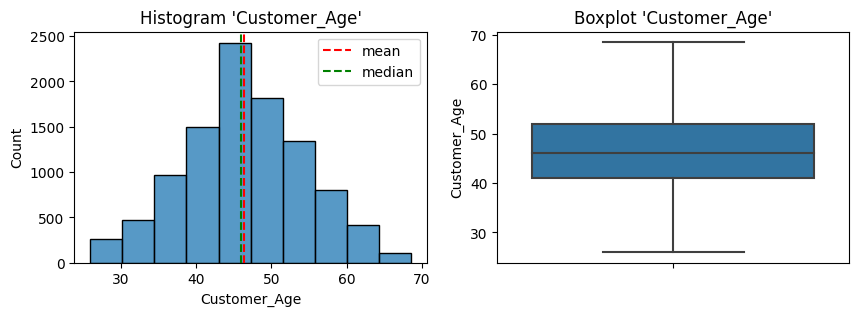

Customer_Age Kurtosis: -0.29395512933091483
Customer_Age Skewness: -0.03597414345901536
Columns 'Customer_Age' is normally distributed


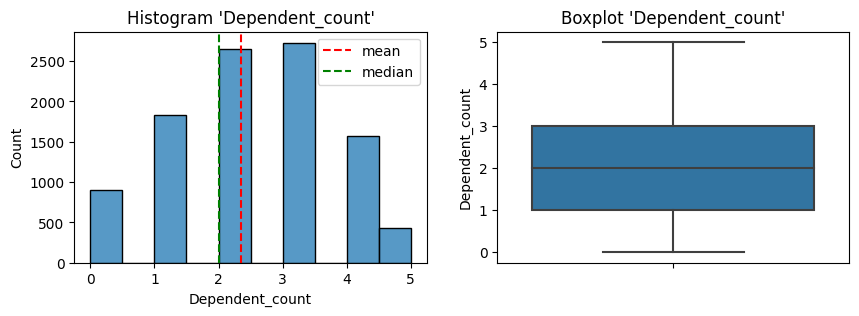

Dependent_count Kurtosis: -0.6831843535797568
Dependent_count Skewness: -0.020859842023183396
Columns 'Dependent_count' is normally distributed


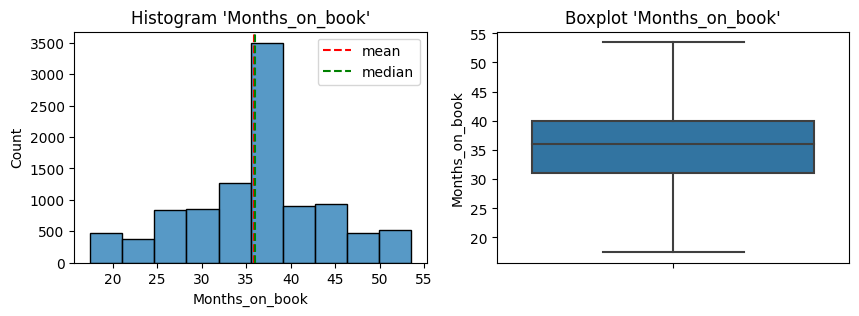

Months_on_book Kurtosis: 0.07052274143025583
Months_on_book Skewness: -0.06467534939994084
Columns 'Months_on_book' is normally distributed


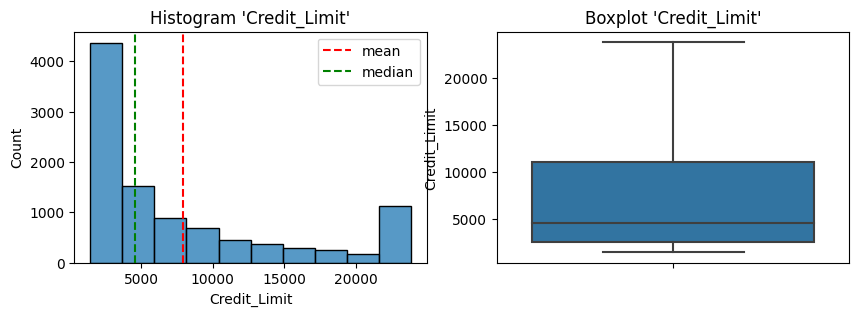

Credit_Limit Kurtosis: 0.08661025545598111
Credit_Limit Skewness: 1.1974528799766568
Columns 'Credit_Limit' is highly right skewed


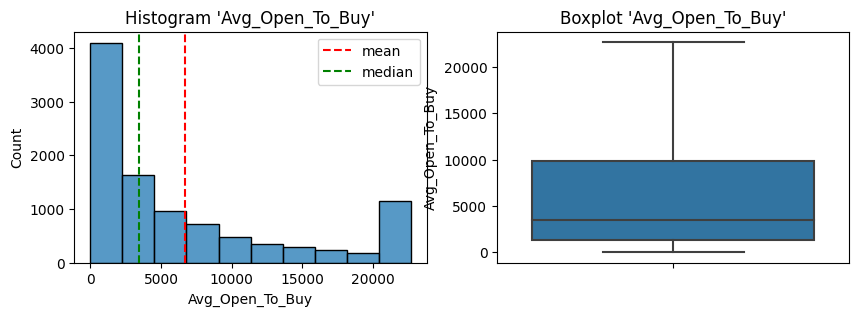

Avg_Open_To_Buy Kurtosis: 0.06847022192247643
Avg_Open_To_Buy Skewness: 1.190911526755994
Columns 'Avg_Open_To_Buy' is highly right skewed


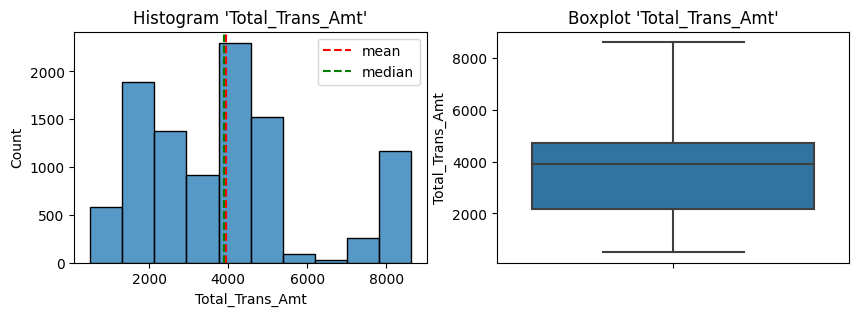

Total_Trans_Amt Kurtosis: -0.027068546044704878
Total_Trans_Amt Skewness: 0.8367918404582974
Columns 'Total_Trans_Amt' is moderately right skewed


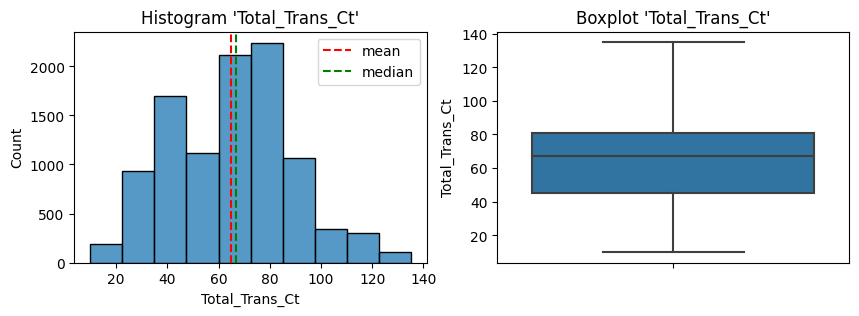

Total_Trans_Ct Kurtosis: -0.3708298526531766
Total_Trans_Ct Skewness: 0.15283527109472086
Columns 'Total_Trans_Ct' is normally distributed


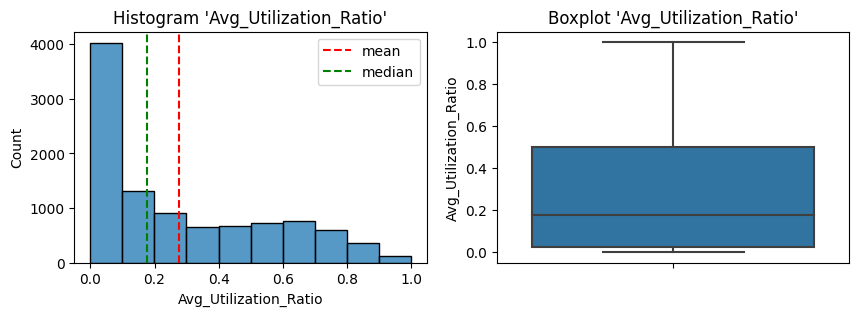

Avg_Utilization_Ratio Kurtosis: -0.7942804371884309
Avg_Utilization_Ratio Skewness: 0.7184704821858682
Columns 'Avg_Utilization_Ratio' is moderately right skewed


In [ ]:
# plot fitur setelah dilakukkan capping
for i, col_name in enumerate(numeric_col):
    plot_diagnostic(df_preproces, col_name)

Setelah dilakukan handling outlier, kolom kolom tersebut sudah tidak memiliki outlier.

## Handling Class Imbalance

> Saat data target tidak seimbang, algoritma klasifikasi dapat menjadi bias terhadap kelas mayoritas dan mungkin tidak bekerja dengan baik dalam memprediksi kelas minoritas. Teknik resampling ini digunakan untuk mengatasi masalah baik dengan menambah jumlah sampel di kelas minoritas (oversampling) atau mengurangi jumlah sampel di kelas mayoritas (undersampling).

In [ ]:
X_train.head()

,Customer_Age,Gender,Dependent_count,Card_Category,Months_on_book,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
8796,47,M,3,Blue,38,31987.0,31987.0,7926,83,0.000
2389,47,F,3,Blue,36,1438.3,666.3,2250,40,0.537
1818,48,F,3,Silver,35,10357.0,10357.0,911,25,0.000
3127,34,F,4,Silver,29,30702.0,30029.0,2652,64,0.022
9335,38,M,3,Blue,27,34516.0,34516.0,13781,106,0.000


In [ ]:
y_train.head()

,Credit_Risk
8796,1
2389,0
1818,0
3127,0
9335,1


In [ ]:
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([1,3], random_state = 42)
X_smote, y_smote = smotenc.fit_resample(X_train, y_train)

In [ ]:
# gabungan data train smote dengan target
df_train_smote = X_smote.copy()
df_train_smote['Credit_Risk'] = y_smote

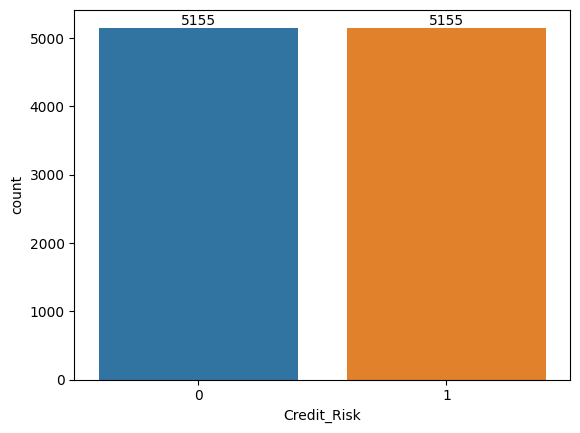

In [ ]:
# plot perbandingan jumlah target setelah handling class imbalance
ax = sns.countplot(x=df_train_smote.Credit_Risk, data=df_train_smote)
ax.bar_label(ax.containers[0])
plt.show()

## Pipeline

>Membuat pipeline selama definisi model adalah teknik yang ampuh dalam machine learning yang melibatkan penggabungan beberapa langkah ke dalam satu alur kerja terpadu. Sebuah pipeline memungkinkan untuk menyatukan berbagai langkah preprocessing dan modeling, memastikan bahwa seluruh proses mulus dan efisien. Ini menyederhanakan proses training dan evaluasi model.

> Pada section ini dilakukan pembuatan pipeline dimana untuk :
- Kolom numerik akan di handling outlier menggunakan capping IQR, untuk missing value menggunakan imputasi median, dan scaler akan menggunakan standardscaler karena skew rata-rata normal.
- Kolom kategorikan dilakukan encoding menggunakan OneHotEncoder.
- Dan setelah itu kedua data hasil numerical dan kategorikal tersebut akan digabungkan ke dalam column transformer dengan variabel bernama preprocessor.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
num_col = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']
cat_col = ['Gender', 'Card_Category']

In [ ]:
num_pipe = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both')),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('encoding', OneHotEncoder(drop='first'))
])

preprocess = ColumnTransformer([
        ("num", num_pipe, num_col),
        ("cat", cat_pipe, cat_col)
    ])


# Model Definition

> Pada section ini menjelaskan proses penentuan arsitektur model machine learning.

Pada model klasifikasi ini, saya memilih model Gaussian Naive Bayes, Gradient Boosting, dan KNeighborsClassifier.

1. Gaussian Naive Bayes :
- Alasan : Gaussian Naive Bayes adalah model klasifikasi yang csederhana dan efisien. Pemilihan model ini berkaitan dengan asumsi bahwa data jumlah total transaksi dapat mengikuti distribusi Gaussian.
- Kelebihan : Model ini memiliki kompleksitas rendah dan cenderung tahan terhadap overfitting pada dataset yang relatif sederhana.

2. Gradient Boosting :
- Alasan : Gradient Boosting adalah pilihan yang kuat ketika prediksi risiko kredit memerlukan model yang kompleks dan mampu menangani hubungan non-linear antara fitur.
- Kelebihan : model ini membangun serangkaian decision tree yang ditingkatkan secara berurutan dengan fokus pada mengoreksi kesalahan model sebelumnya. Sehinggga memberikan akurasi yang tinggi dan kemampuan untuk menangani interaksi yang kompleks antara fitur.

3. KNeighborsClassifier:
- Alasan : KNeighborsClassifier cocok ketika ingin memanfaatkan informasi dari data yang serupa untuk membuat prediksi, sehingga relevan dalam mengklasifikasikan risiko kredit berdasarkan pola transaksi yang mirip.
- Kelebihan : Model ini mengasumsikan bentuk distribusi data tertentu dan dapat mengakomodasi pola yang kompleks.

Pemilihan model sebaiknya berdasarkan pada evaluasi kinerja model melalui cross-validation dan pemahaman tentang karakteristik data. Setiap model memiliki trade-off yang berbeda antara kompleksitas dan akurasi.

In [ ]:
# Model Gaussian Naive Bayes
pipeline_nb = Pipeline([
    ('preprocess', preprocess),
    ('model', GaussianNB())
])

# Model Gradient Boosting
pipeline_gb = Pipeline([
    ('preprocess', preprocess),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Model KNN
pipeline_knn = Pipeline([
    ('preprocess', preprocess),
    ('model', KNeighborsClassifier())
])

# Model Training dan Model Evaluation

> Section ini menjelaskan proses training model dan evaluasi model.

In [ ]:
# Convert y_smote to a 1-dimensional array
y_smote_1d = y_smote['Credit_Risk'].values.ravel()

In [ ]:
# train data pada model randomforest
pipeline_nb.fit(X_smote, y_smote_1d)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Credit_Limit',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Avg_Utilization_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender',
                                                   'Card_Category'])])),
                ('model', GaussianNB())])

In [ ]:
# train data pada model GradientBoostingClassifier
pipeline_gb.fit(X_smote, y_smote_1d)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Credit_Limit',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Avg_Utilization_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender',
                                                   'Card_Category'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

In [ ]:
# train data pada model KNeighborsClassifier
pipeline_knn.fit(X_smote, y_smote_1d)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Credit_Limit',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Avg_Utilization_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender',
                                                   'Card_Category'])])),
                ('model', KNeighborsClassifier())])

## Cross Validation

Cross validation adalah teknik statistik yang digunakan selama proses pelatihan model untuk menilai seberapa baik algoritma machine learning menggeneralisasi data.

In [ ]:
# Cross Validation using `cross_val_score` for train set
cv_nb = cross_val_score(pipeline_nb,
                                  X_smote,
                                  y_smote_1d,
                                  cv=5,
                                  scoring='precision')

print("precision Score - All - Cross Validation  :", cv_nb)
print("precision Score - Mean - Cross-Validation :", cv_nb.mean())
print("precision Score - Std - Cross-Validation  :", cv_nb.std())

precision Score - All - Cross Validation  : [0.85136251 0.86493289 0.84369885 0.84925865 0.86131997]
precision Score - Mean - Cross-Validation : 0.8541145732484539
precision Score - Std - Cross-Validation  : 0.007856139408761668


In [ ]:
# Cross Validation using `cross_val_score` for train set
cv_gb = cross_val_score(pipeline_gb,
                                  X_smote,
                                  y_smote_1d,
                                  cv=5,
                                  scoring='precision')

print("precision Score - All - Cross Validation  :", cv_gb)
print("precision Score - Mean - Cross-Validation :", cv_gb.mean())
print("precision Score - Std - Cross-Validation  :", cv_gb.std())

precision Score - All - Cross Validation  : [0.88810573 0.91       0.86982759 0.89217391 0.89754816]
precision Score - Mean - Cross-Validation : 0.8915310774486924
precision Score - Std - Cross-Validation  : 0.013118644688991474


In [ ]:
# Cross Validation using `cross_val_score` for train set
cv_knn = cross_val_score(pipeline_knn,
                                  X_smote,
                                  y_smote_1d,
                                  cv=5,
                                  scoring='precision')

print("precision Score - All - Cross Validation  :", cv_knn)
print("precision Score - Mean - Cross-Validation :", cv_knn.mean())
print("precision Score - Std - Cross-Validation  :", cv_knn.std())

precision Score - All - Cross Validation  : [0.86767318 0.87802691 0.85517241 0.87554019 0.88204683]
precision Score - Mean - Cross-Validation : 0.8716919047021822
precision Score - Std - Cross-Validation  : 0.009499577264711527


In [ ]:
# Model Comparision based on Cross-Validation Score
crossval = [cv_nb,cv_gb,cv_knn]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Naive Bayes', 'Gradient Boosting', 'KNeighbors']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,3)
bestmodel['Std']=np.round(std,3)
bestmodel.rename(columns={0:'Algorithm Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Algorithm Model,Mean,Std
0,Gradient Boosting,0.892,0.013
1,KNeighbors,0.872,0.009
2,Naive Bayes,0.854,0.008


Berdasarkan skor cross-validation, model Gradient Boosting memiliki rata-rata skor tertinggi (0.892) dan skor standar deviasi (0.013). Selanjutnya dilakukan evaluasi model.

In [ ]:
# Best Model - Baseline Parameter
best_model = pipeline_gb

# Fitting XGBoost Classifier model - Baseline Parameter
best_model.fit(X_smote,y_smote_1d)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              tail='both')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Credit_Limit',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Avg_Utilization_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender',
                                                   'Card_Category'])])),
                ('model', GradientBoostingClassifier(random_state=42))])

## Model Evaluation -- Baseline Parameter

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

---------Classification Report (Train Set) - ---------
              precision    recall  f1-score   support

           0       0.99      0.89      0.93      5155
           1       0.90      0.99      0.94      5155

    accuracy                           0.94     10310
   macro avg       0.94      0.94      0.94     10310
weighted avg       0.94      0.94      0.94     10310



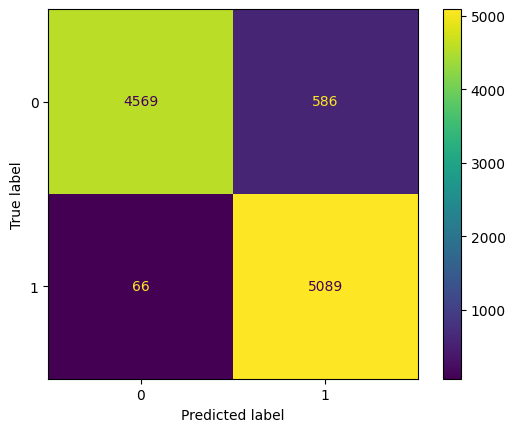

In [ ]:
# Predict target (y_train dan y_test)
y_pred_train = best_model.predict(X_smote)
y_pred_test = best_model.predict(X_test)

# Determining classification report for train set
print('---------Classification Report (Train Set) - ---------')
print(classification_report(y_smote,y_pred_train))

# Creating confusion matrix for train set
cm = confusion_matrix(y_smote, y_pred_train, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)

disp.plot()
plt.grid(False)
plt.show()

---------Classification Report (Test Set)---------
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1300
           1       0.82      0.97      0.89       724

    accuracy                           0.91      2024
   macro avg       0.90      0.93      0.91      2024
weighted avg       0.92      0.91      0.92      2024



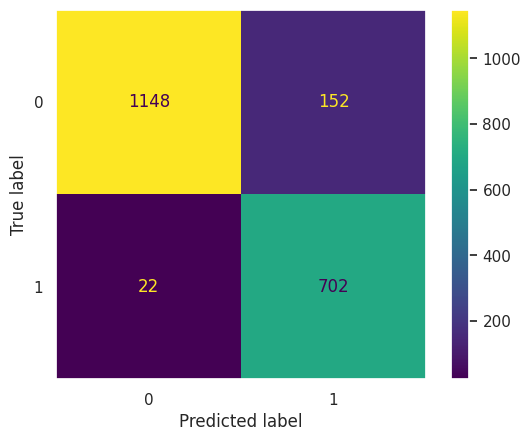

In [ ]:
# Determining classification report for test set
print('---------Classification Report (Test Set)---------')
print(classification_report(y_test,y_pred_test))


# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test, y_pred_test, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)

disp.plot()
plt.grid(False)
plt.show()

Dari hasil klasifikasi di atas, diketahui bahwa :
- Precision : Untuk kelas 0.0 (Low Risk) memiliki nilai precision 0.98 yang berarti bahwa 98% dari prediksi high-risk diprediksi dengan benar. Untuk kelas 1.0 (High Risk) memiliki nilai precision 0.82 yang berarti bahwa 82% dari prediksi low-risk di prediksi dengan benar.

- Recall : Recall untuk kedua kelas tergolong tinggi, yaitu 0.88 untuk kelas 0.0 (Low Risk) dan 0.97 untuk kelas 1.0 (High Risk). Ini menyiratkan bahwa model tersebut efektif dalam menangkap persentase.

- F1-Score : merupakan rata-rata precision dan recall. Untuk kelas 0.0 memiliki nilai 0.93 dan untuk kelas 1.0 memiliki nilai 0.89. Ini menunjukkan keseimbangan yang baik antara precision dan recall untuk kedua kelas.

- Accuracy : accuracy pada keseluruhan model pada test set adalah 0.91 yang menunjukkan bahwa model tersebut mengklasifikasikan dengan benar sebesar 91%.

Secara keseluruhan, model bekerja dengan baik dalam membedakan antara nasabah high-risk dan low-risk.

## Hyperparameter Tuning

> Hyperparameter tuning selanjutnya dilakukan untuk best model. Tujuannya adalah untuk menemukan kumpulan hyperparameter yang menghasilkan performa terbaik.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for Randomized Search
param_dist = {
    'model__n_estimators': [25, 50, 75],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [2, 5, 8],
    'model__criterion': ['friedman_mse', 'squared_error'],
}

# Create the Randomized Search object
random_search = RandomizedSearchCV(best_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='precision')

# Fit the Randomized Search on the training data
random_search.fit(X_smote, y_smote_1d)

# Get the best estimator from the Randomized Search
best_est = random_search.best_estimator_

# Get the best hyperparameters found during the Randomized Search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'model__n_estimators': 75, 'model__min_samples_split': 8, 'model__max_depth': 5, 'model__learning_rate': 0.2, 'model__criterion': 'friedman_mse'}


## Model Evaluation -- Hyperparameter Tuning

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      5155
           1       0.93      1.00      0.96      5155

    accuracy                           0.96     10310
   macro avg       0.96      0.96      0.96     10310
weighted avg       0.96      0.96      0.96     10310

Confusion Matrix Train Set


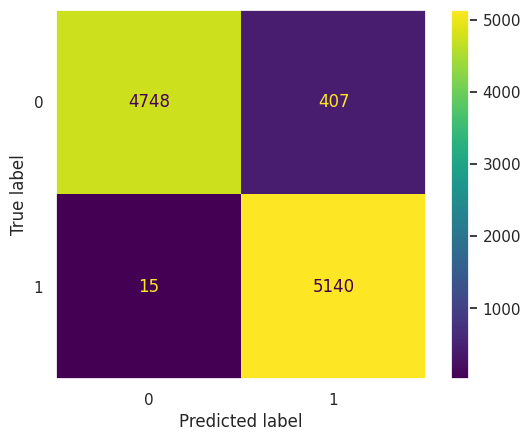

In [ ]:
# Predicting target (y_train and y_test) with Best Estimator
y_pred_train_grid = best_est.predict(X_smote)
y_pred_test_grid = best_est.predict(X_test)

# Creating confusion matrix for train set
print('Classification Report : \n', classification_report(y_smote, y_pred_train_grid))
print('Confusion Matrix Train Set')
cm = confusion_matrix(y_smote, y_pred_train_grid, labels=best_est.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_est.classes_)

disp.plot()
plt.grid(False)
plt.show()

---------Classification Report (Test Set)---------
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1300
           1       0.82      0.95      0.88       724

    accuracy                           0.91      2024
   macro avg       0.90      0.92      0.90      2024
weighted avg       0.92      0.91      0.91      2024



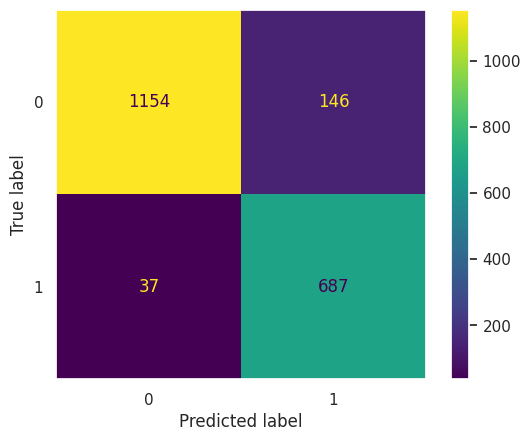

In [ ]:
# Determining classification report for test set
print('---------Classification Report (Test Set)---------')
print(classification_report(y_test,y_pred_test_grid))


# Creating confusion matrix for test set
sns.set(font_scale=1)
cm = confusion_matrix(y_test, y_pred_test_grid, labels=best_est.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_est.classes_)

disp.plot()
plt.grid(False)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Save Classification Report into a Dictionary
all_reports_hyper = {}
score_reports_baseline = {
    'train - precision' : round(precision_score(y_smote, y_pred_train),3),
    'train - recall' : round(recall_score(y_smote, y_pred_train),3),
    'train - accuracy' : round(accuracy_score(y_smote, y_pred_train),3),
    'train - f1_score' : round(f1_score(y_smote, y_pred_train),3),
    'test - precision' : round(precision_score(y_test, y_pred_test),3),
    'test - recall' : round(recall_score(y_test, y_pred_test),3),
    'test - accuracy' : round(accuracy_score(y_test, y_pred_test),3),
    'test - f1_score' : round(f1_score(y_test, y_pred_test),3),
}
all_reports_hyper['baseline'] = score_reports_baseline

score_reports_grid = {
    'train - precision' : round(precision_score(y_smote, y_pred_train_grid),3),
    'train - recall' : round(recall_score(y_smote, y_pred_train_grid),3),
    'train - accuracy' : round(accuracy_score(y_smote, y_pred_train_grid),3),
    'train - f1_score' : round(f1_score(y_smote, y_pred_train_grid),3),
    'test - precision' : round(precision_score(y_test, y_pred_test_grid),3),
    'test - recall' : round(recall_score(y_test, y_pred_test_grid),3),
    'test - accuracy' : round(accuracy_score(y_test, y_pred_test_grid),3),
    'test - f1_score' : round(f1_score(y_test, y_pred_test_grid),3),
}
all_reports_hyper['RandomizedCV'] = score_reports_grid

# create dataframe
pd.DataFrame(all_reports_hyper)

,baseline,RandomizedCV
train - precision,0.897,0.927
train - recall,0.987,0.997
train - accuracy,0.937,0.959
train - f1_score,0.940,0.961
test - precision,0.822,0.825
test - recall,0.970,0.949
test - accuracy,0.914,0.910
test - f1_score,0.890,0.882


Berdasarkan tabel di atas, model hasil RandomizedCV memiliki accuracy, precision, recall, dan F1-score yang sedikit lebih tinggi pada test set. Hal ini menunjukkan bahwa kinerja hyperparameter tuning lebih baik dibandingkan dengan model baseline.

Dari hasil klasifikasi menggunakan RandomizedCV didapatkan nilai accuracy sebesar 91% dalam mengklasifikasikan kasus dengan benar.

# Save Model

> Pada section ini merupakan proses penyimpanan model yang telah dibuat di bagian sebelumnya.

In [ ]:
# save tuned-model random forest
with open('best_model.pkl','wb') as file_1:
    joblib.dump(best_est,file_1)

# Conclusion

> Based on Exploratory Data Analysis (EDA)
- Kolom credit_risk pada dataset menunjukkan distribusi kelas yang tidak seimbang, dengan jumlah low risk lebih banyak dibandingkan high risk
- Rata-rata usia nasabah adalah 46 tahun dengan rentang usia 26 hingga 73 tahun
- Rata-rata masa hubungan nasabah dengan bank adalah sekitar 36 bulan (3tahun)
- Rata-rata credit limit adalah sekitar $8632
- Terdapat pola yang menunjukkan bahwa individu dengan tingkat pendidikan yang lebih rendah cenderung memiliki risiko kredit yang lebih rendah
- Rata-rata nasabah memakai card category "Blue" dibandingkan kategori yang lain
- Dalam credit risk, gender pria lebih banyak mengalami high risk dibandingkan wanita

> Based on Model Evaluation
- Berdasarkan best model diperoleh Gradient Boosting dengan hyperparameter tuning menggunakan RandmoizedCV. Dalam hal ini diperoleh nilai train test sebesar 96% dan test set sebesar 91%, sehingga model ini termasuk goodfit.

> Business insight
- Dalam dunia finansial, manajemen resiko kredit memegang peranan krusial dalam memastikan keseimbangan antara memberikan pinjaman kepada nasabah dan meminimalkan risiko. Untuk mencapai tujuan ini, diperlukan strategi yang kokoh dan berfokus pada pengelolaan risiko dengan bijak.
- Dengan memahami profil risiko nasabah, kita dapat merancang strategi khusus untuk setiap segmen. Sehingga memungkinkan untuk memberikan penawaran kredit yang lebih sesuai dengan kemampuan dan karakteristik setiap kelompok, mengurangi risiko secara keseluruhan.
- Bekerjasama dengan lembaga riset kredit dan penyedia layanan data eksternal dapat memberikan wawasan tambahan. Informasi dari luar bisa memberikan pandangan yang lebih luas tentang pelanggan dan lingkungan ekonomu yang mungkin mempengaruhi kemampuan pelanggan untuk membayar.